In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16, 6)

In [2]:
top_image_path = './data/07977_T.png'
side_image_path = './data/07977_S.png'
side_mask_path = './side_mask.png'

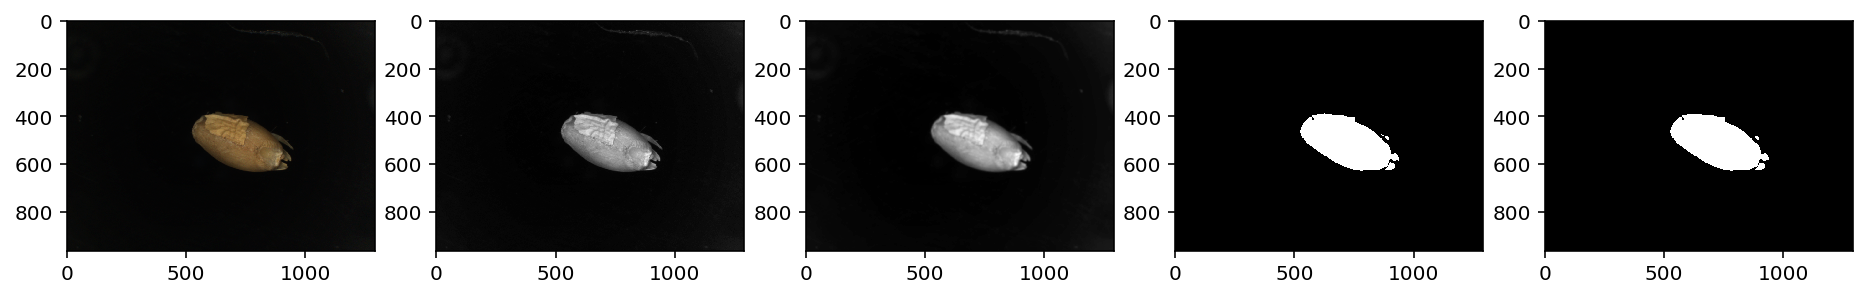

In [3]:
top_image = cv2.imread(top_image_path)
image_rgb = cv2.cvtColor(top_image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(top_image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (15, 15), 0)
_, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
top_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 5, 1), plt.imshow(image_rgb)
plt.subplot(1, 5, 2), plt.imshow(gray, 'gray')
plt.subplot(1, 5, 3), plt.imshow(blur, 'gray')
plt.subplot(1, 5, 4), plt.imshow(threshold, 'gray')
plt.subplot(1, 5, 5), plt.imshow(top_opening, 'gray')
plt.show()

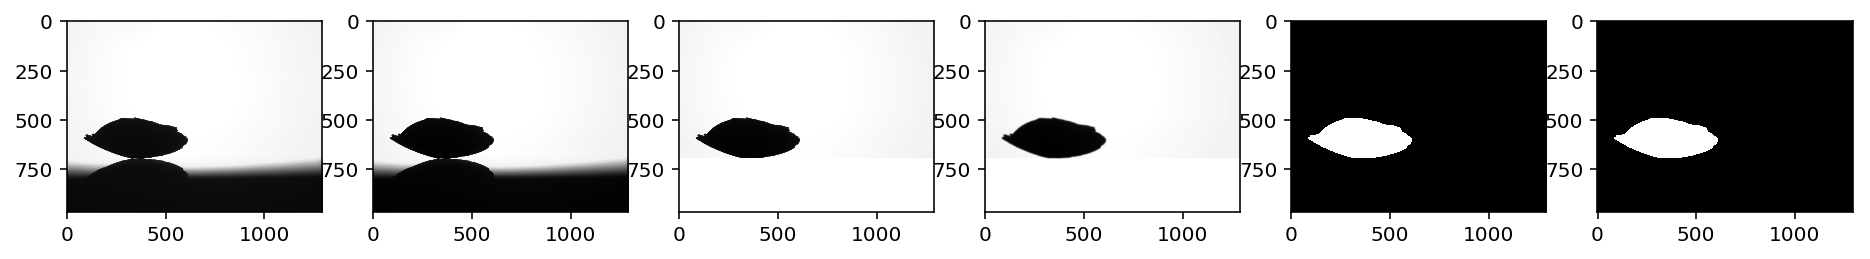

In [4]:
side_image = cv2.imread(side_image_path)
side_mask = cv2.imread(side_mask_path, 0)
side_mask_inv = cv2.bitwise_not(side_mask)
image_rgb = cv2.cvtColor(side_image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(side_image, cv2.COLOR_BGR2GRAY)
mask = cv2.bitwise_or(gray, side_mask_inv)
blur = cv2.GaussianBlur(mask, (15, 15), 0)
_, threshold = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((5, 5), np.uint8)
side_opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)

plt.subplot(1, 6, 1), plt.imshow(image_rgb)
plt.subplot(1, 6, 2), plt.imshow(gray, 'gray')
plt.subplot(1, 6, 3), plt.imshow(mask, 'gray')
plt.subplot(1, 6, 4), plt.imshow(blur, 'gray')
plt.subplot(1, 6, 5), plt.imshow(threshold, 'gray')
plt.subplot(1, 6, 6), plt.imshow(side_opening, 'gray')
plt.show()

In [5]:
_, top_contours, _ = cv2.findContours(top_opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
_, side_contours, _ = cv2.findContours(side_opening.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# choose contour with the largest area
top_contours.sort(key=lambda c: cv2.contourArea(c))
top_cnt = top_contours[-1]
side_contours.sort(key=lambda c: cv2.contourArea(c))
side_cnt = side_contours[-1]

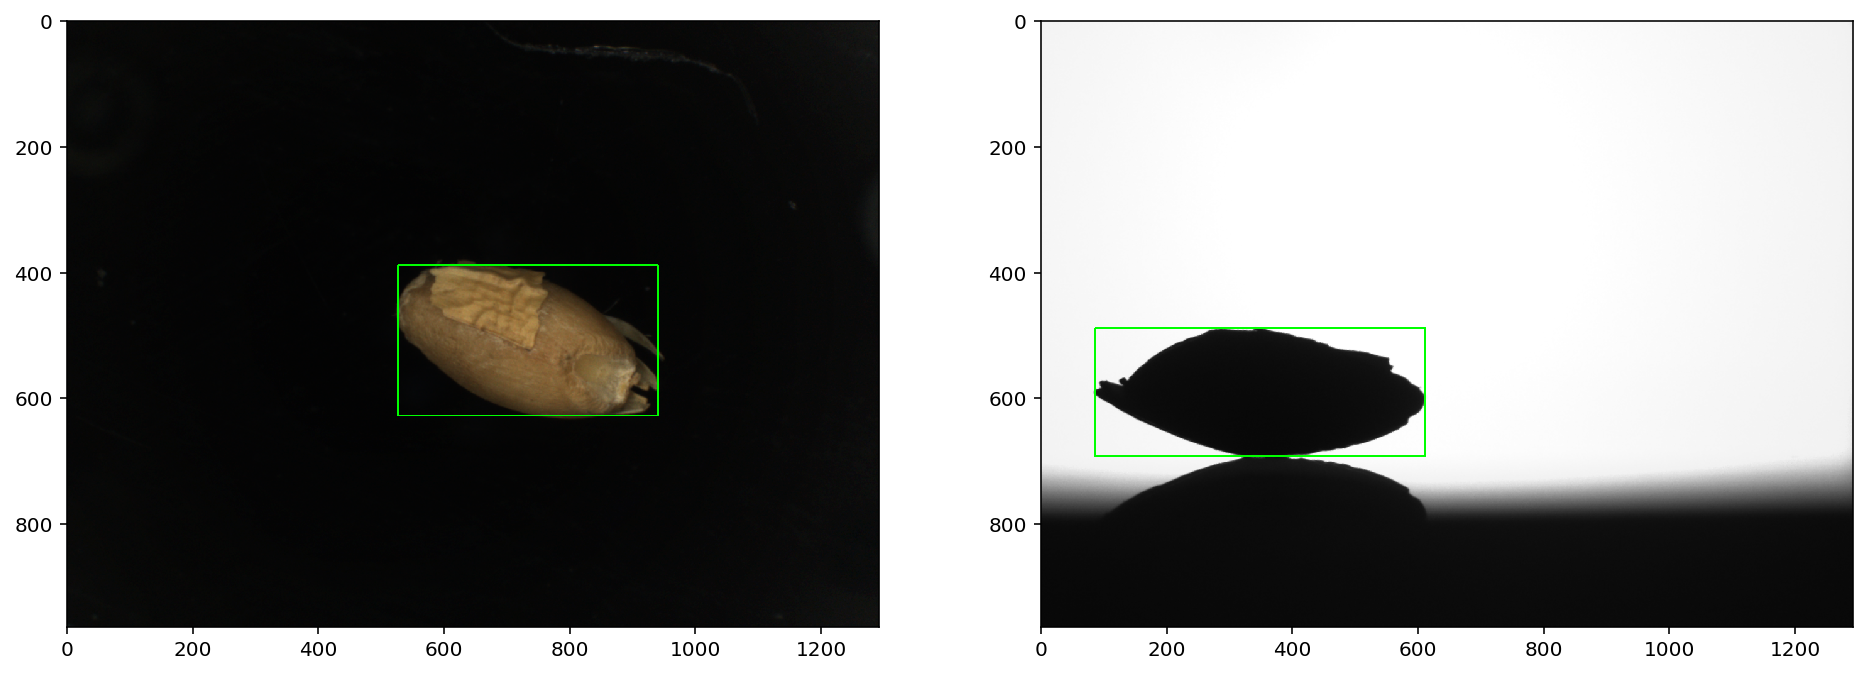

Width:  414px
Height: 239px
Depth:  204px


In [6]:
x, y, w, h = cv2.boundingRect(top_cnt)
top_img = top_image.copy()
cv2.rectangle(top_img, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.imshow(image_rgb)

x, y, w1, d = cv2.boundingRect(side_cnt)
side_img = side_image.copy()
cv2.rectangle(side_img, (x, y), (x + w1, y + d), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(side_img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2), plt.imshow(image_rgb)
plt.show()

print('Width:  {:.0f}px'.format(w))
print('Height: {:.0f}px'.format(h))
print('Depth:  {:.0f}px'.format(d))

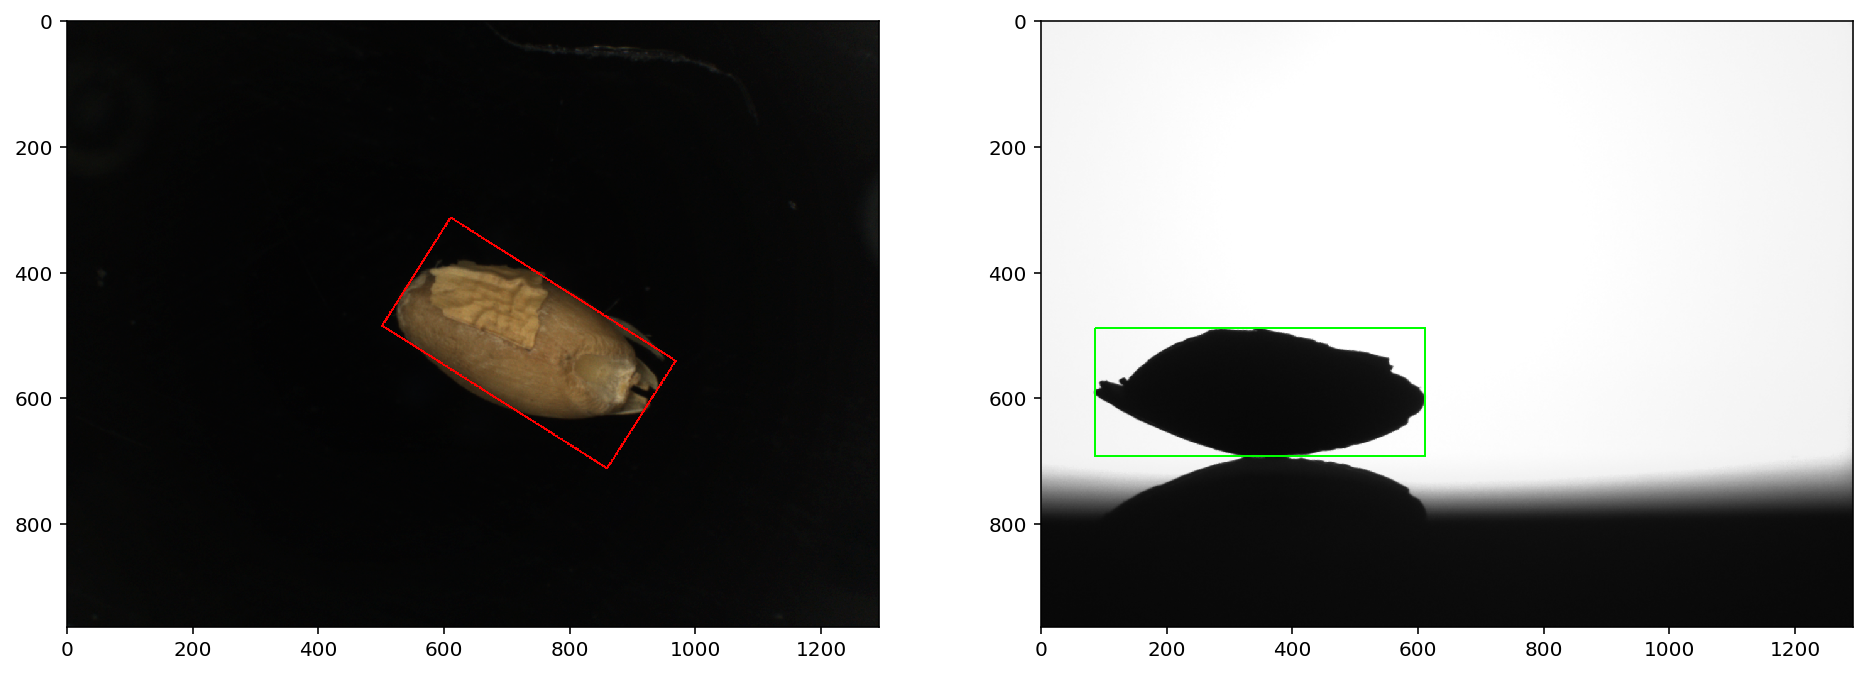

Width:  203px
Height: 424px
Depth:  204px


In [7]:
rect = cv2.minAreaRect(top_cnt)
_, size, _  = rect

box = cv2.boxPoints(rect)
box = np.int0(box)
top_img = top_image.copy()
cv2.drawContours(top_img, [box], 0, (0, 0, 255), 2)

image_rgb = cv2.cvtColor(top_img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1), plt.imshow(image_rgb)
image_rgb = cv2.cvtColor(side_img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 2), plt.imshow(image_rgb)
plt.show()

w = sorted(size)[0]
h = sorted(size)[1]

print('Width:  {:.0f}px'.format(w))
print('Height: {:.0f}px'.format(h))
print('Depth:  {:.0f}px'.format(d))